In [15]:
%load_ext autoreload
%autoreload 2

import numpy as np
from omegaconf import OmegaConf
from src.models import models
from src.models import model as mainmodel
from src.models import modelConv2d
from src.models import modelineal
from src.models import decoders
from src import loss_func
from src import train
from src import loader
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from src import optimizer_Factory as of
import Data.genData as genData
from src import custom_plots as cp
from src import Visual_utils as vu
import torchvision
import wandb
import random
import os

from scipy.signal import savgol_filter


os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:2000"
torch.cuda.empty_cache() 
torch.manual_seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Latent Models

In [20]:
torch.cuda.empty_cache() 
torch.manual_seed(0)

data_folder = np.load('Data/dataset_intensity.npy')
data_train = data_folder
print(data_train.shape)
dt = 0.2
train_dataloader, test_dataloader, train_x, val_x  = loader.getLoader_folder(data_train, split=True)




latentEncoder_I = mainmodel.EndPhys(dt = dt,  
                                pmodel = "Damped_oscillation",
                                init_phys = 1.0, 
                                initw=True)

latentEncoder_I, log, params  = train.train(latentEncoder_I, 
                                train_dataloader, 
                                test_dataloader,
                                init_phys = 1.0,                                 
                                loss_name='latent_loss')

(500, 20, 1, 50, 50)
dt 0.2
Using device: cuda


Initial Loss 	 training loss: 3.973619919556838 	 validation loss: 3.9561715126037598
epoch: 10 	 training loss: 0.7078050420834467 	 validation loss: 0.6933690309524536
epoch: 20 	 training loss: 0.589109874688662 	 validation loss: 0.5532989054918289
epoch: 30 	 training loss: 0.0948897863809879 	 validation loss: 0.06858404260128736
epoch: 40 	 training loss: 0.023244766070722386 	 validation loss: 0.05149347521364689
epoch: 50 	 training loss: 0.03794740423416862 	 validation loss: 0.1419455036520958
epoch: 60 	 training loss: 0.01551240743496097 	 validation loss: 0.00992170546669513
epoch: 70 	 training loss: 0.04685949319257186 	 validation loss: 0.01677600503899157
epoch: 80 	 training loss: 0.02155554278467137 	 validation loss: 0.009517304541077465
epoch: 90 	 training loss: 0.04695622352525019 	 validation loss: 0.08063392527401447
epoch: 100 	 training loss: 0.012087522253680687 	 validation loss: 0.010909545700997114


best model a 3.915309429168701
best last a 3.9207189083099365
best model b 0.05642757564783096
best last b 0.0656224861741066


In [24]:
torch.cuda.empty_cache() 
torch.manual_seed(0)

data_folder = np.load('Data/dataset_motion.npy')
data_train = data_folder
print(data_train.shape)
dt = 0.2
train_dataloader, test_dataloader, train_x, val_x  = loader.getLoader_folder(data_train, split=True)




latentEncoder_m = mainmodel.EndPhys(dt = dt,  
                                pmodel = "Damped_oscillation",
                                init_phys = 1.0,
                                initw=True)

latentEncoder_m, log, params  = train.train(latentEncoder_m, 
                                train_dataloader, 
                                test_dataloader,
                                init_phys = 0.5,                                 
                                loss_name='latent_loss')

(500, 20, 1, 50, 50)
dt 0.2
Using device: cuda


Initial Loss 	 training loss: 4.397805213928223 	 validation loss: 4.352686762809753
epoch: 10 	 training loss: 0.12989322626246855 	 validation loss: 0.05013984069228172
epoch: 20 	 training loss: 0.07232393166766717 	 validation loss: 0.04526430694386363
epoch: 30 	 training loss: 0.04727021891337175 	 validation loss: 0.02216274943202734
epoch: 40 	 training loss: 0.03775601748090524 	 validation loss: 0.10719851311296225
epoch: 50 	 training loss: 0.04575846200952163 	 validation loss: 0.11329657770693302
epoch: 60 	 training loss: 0.023657406250444744 	 validation loss: 0.021894944831728935
epoch: 70 	 training loss: 0.026868225075304508 	 validation loss: 0.0577303827740252
epoch: 80 	 training loss: 0.03704057504924444 	 validation loss: 0.038727174047380686
epoch: 90 	 training loss: 0.054569425634466685 	 validation loss: 0.041646485682576895
epoch: 100 	 training loss: 0.04067204792339068 	 validation loss: 0.028900781646370888


best model a 3.8843488693237305
best last a 3.9329583644866943
best model b 0.13041216135025024
best last b 0.07143323868513107


In [45]:
torch.cuda.empty_cache() 
torch.manual_seed(0)

data_folder = np.load('Data/dataset_Scale_nu2.npy')
data_train = data_folder
print(data_train.shape)
dt = 0.2
train_dataloader, test_dataloader, train_x, val_x  = loader.getLoader_folder(data_train, split=True)




latentEncoder_s = mainmodel.EndPhys(dt = dt,  
                                pmodel = "Damped_oscillation",
                                init_phys = 1.0,
                                initw=True)

latentEncoder_s, log, params  = train.train(latentEncoder_s, 
                                train_dataloader, 
                                test_dataloader,
                                init_phys = 0.1,                                 
                                loss_name='latent_loss')

(500, 20, 1, 50, 50)
dt 0.2
Using device: cuda


Initial Loss 	 training loss: 4.109610722615169 	 validation loss: 4.164360284805298
epoch: 10 	 training loss: 0.06865275450623952 	 validation loss: 0.17388127371668816
epoch: 20 	 training loss: 0.06252273114827964 	 validation loss: 0.06276981346309185
epoch: 30 	 training loss: 0.07916191850717251 	 validation loss: 0.14635982364416122
epoch: 40 	 training loss: 0.061385428389677636 	 validation loss: 0.0751802260056138
epoch: 50 	 training loss: 0.07405995205044746 	 validation loss: 0.10969453118741512
epoch: 60 	 training loss: 0.06730681629135059 	 validation loss: 0.08387784846127033
epoch: 70 	 training loss: 0.07996794495445031 	 validation loss: 0.07220513746142387
epoch: 80 	 training loss: 0.06527251807542947 	 validation loss: 0.0702821733430028
epoch: 90 	 training loss: 0.06321937791430034 	 validation loss: 0.06275849603116512
epoch: 100 	 training loss: 0.06137372839909334 	 validation loss: 0.1156510915607214


best model a 4.114145278930664
best last a 4.1285223960876465
best model b 0.9833972454071045
best last b 1.0284076929092407


### LatentSpace Comparison

In [46]:
def normalize(z, a):
    mz = np.mean(z)
    ma = np.mean(a)

    mz = np.min(z)
    ma = np.min(a)

    max_z = np.max(z)
    max_a = np.max(a)

    m = (max_a - ma)/(max_z - mz)
    n = ma - m*mz

    return m*z + n
def normalize_1_0(z):

    max_z = np.max(z)
    mz = np.min(z)
    

    m = (2)/(max_z - mz)

    b = 1 - m*max_z

    return m*z + b
t,a = genData.generateDynamics(max=1, min=0, dt = 0.1)

t = t[:-40]
a = a[:-40]
a = normalize_1_0(a)

n_samples = t.shape[0]
t_train = t[:int(n_samples*0.8)]
t_test = t[int(n_samples*0.8):]

a_train = a[:int(n_samples*0.8)]
a_test = a[int(n_samples*0.8):]

X = []
X.append( { 'x': t_train, 'y': a_train, 'label': 'Simulated Dynamics' , 'alpha':0.2, 'linewidth' :10.0, 'color': 'b'  } )
X.append( { 'x': t_test, 'y': a_test, 'label': '_nolegend_' , 'alpha':0.2, 'linewidth' :10.0 , 'linestyle': '--' , 'color': 'b'   } )
colors = ['b', 'orange', 'red', 'darkgreen', 'm', 'y', 'k', '#FFA500', '#800080', '#008080']
#colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf']
indx_color = 1
for dyn_type in ["Motion","Scale","Intensity"]:
#for dyn_type in ["Intensity"]:
    if dyn_type == "Motion":
        data_folder = np.load('Data/dataset_motion.npy')
        model = latentEncoder_m
    if dyn_type == "Scale":
        data_folder = np.load('Data/dataset_Scale_nu.npy')
        model = latentEncoder_s
    if dyn_type == "Intensity":
        model = latentEncoder_I
        data_folder = np.load('Data/dataset_intensity.npy')

    data_train = data_folder
    dt = 0.2
    dataloader  = loader.getLoader_folder(data_train, split=False)

    z = None

    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)


    for data in dataloader:

        input_Data, out_Data = data

        x0 = input_Data

        x0 = x0.to(device=device, dtype=torch.float)

        x2 = out_Data.to(device=device, dtype=torch.float)

        outputs = model(x0)
        z2_encoder, z2_phys, z3=outputs

        if z is None:
            z = z2_encoder.detach().cpu().numpy()[0][0]
        else:
            z = np.vstack((z,z2_encoder.detach().cpu().numpy()[0][0]))

    z = normalize_1_0(z)

    z_train = z[:int(n_samples*0.8)]
    z_test = z[int(n_samples*0.8):]

    if z_train[0] < 0:
        z_train = -z_train
        z_test = -z_test


   

    X.append( { 'x': t_train, 'y': z_train, 'label': dyn_type , 'alpha':0.8, 'linewidth' :2.0, 'color':colors[indx_color]  } )
    X.append( { 'x': t_test, 'y': z_test, 'label': '_nolegend_' , 'alpha':0.8, 'linewidth' :2.0 , 'linestyle': '--', 'color':colors[indx_color]   } )
    indx_color += 1


    

c:\Users\aleja\Documents\TUDelft\Repository\Vphys\src\custom_plots.py:81: UserWarning: The label '_nolegend_' of <matplotlib.lines.Line2D object at 0x000001F00D2662C0> starts with '_'. It is thus excluded from the legend.
  first_legend = ax.legend(handles=lines[:-2], fontsize="30", loc ="upper right")
c:\Users\aleja\Documents\TUDelft\Repository\Vphys\src\custom_plots.py:81: UserWarning: The label '_nolegend_' of <matplotlib.lines.Line2D object at 0x000001F00D265D80> starts with '_'. It is thus excluded from the legend.
  first_legend = ax.legend(handles=lines[:-2], fontsize="30", loc ="upper right")
c:\Users\aleja\Documents\TUDelft\Repository\Vphys\src\custom_plots.py:81: UserWarning: The label '_nolegend_' of <matplotlib.lines.Line2D object at 0x000001F00D265840> starts with '_'. It is thus excluded from the legend.
  first_legend = ax.legend(handles=lines[:-2], fontsize="30", loc ="upper right")
c:\Users\aleja\Documents\TUDelft\Repository\Vphys\src\custom_plots.py:81: UserWarning: T

<Figure size 640x480 with 0 Axes>

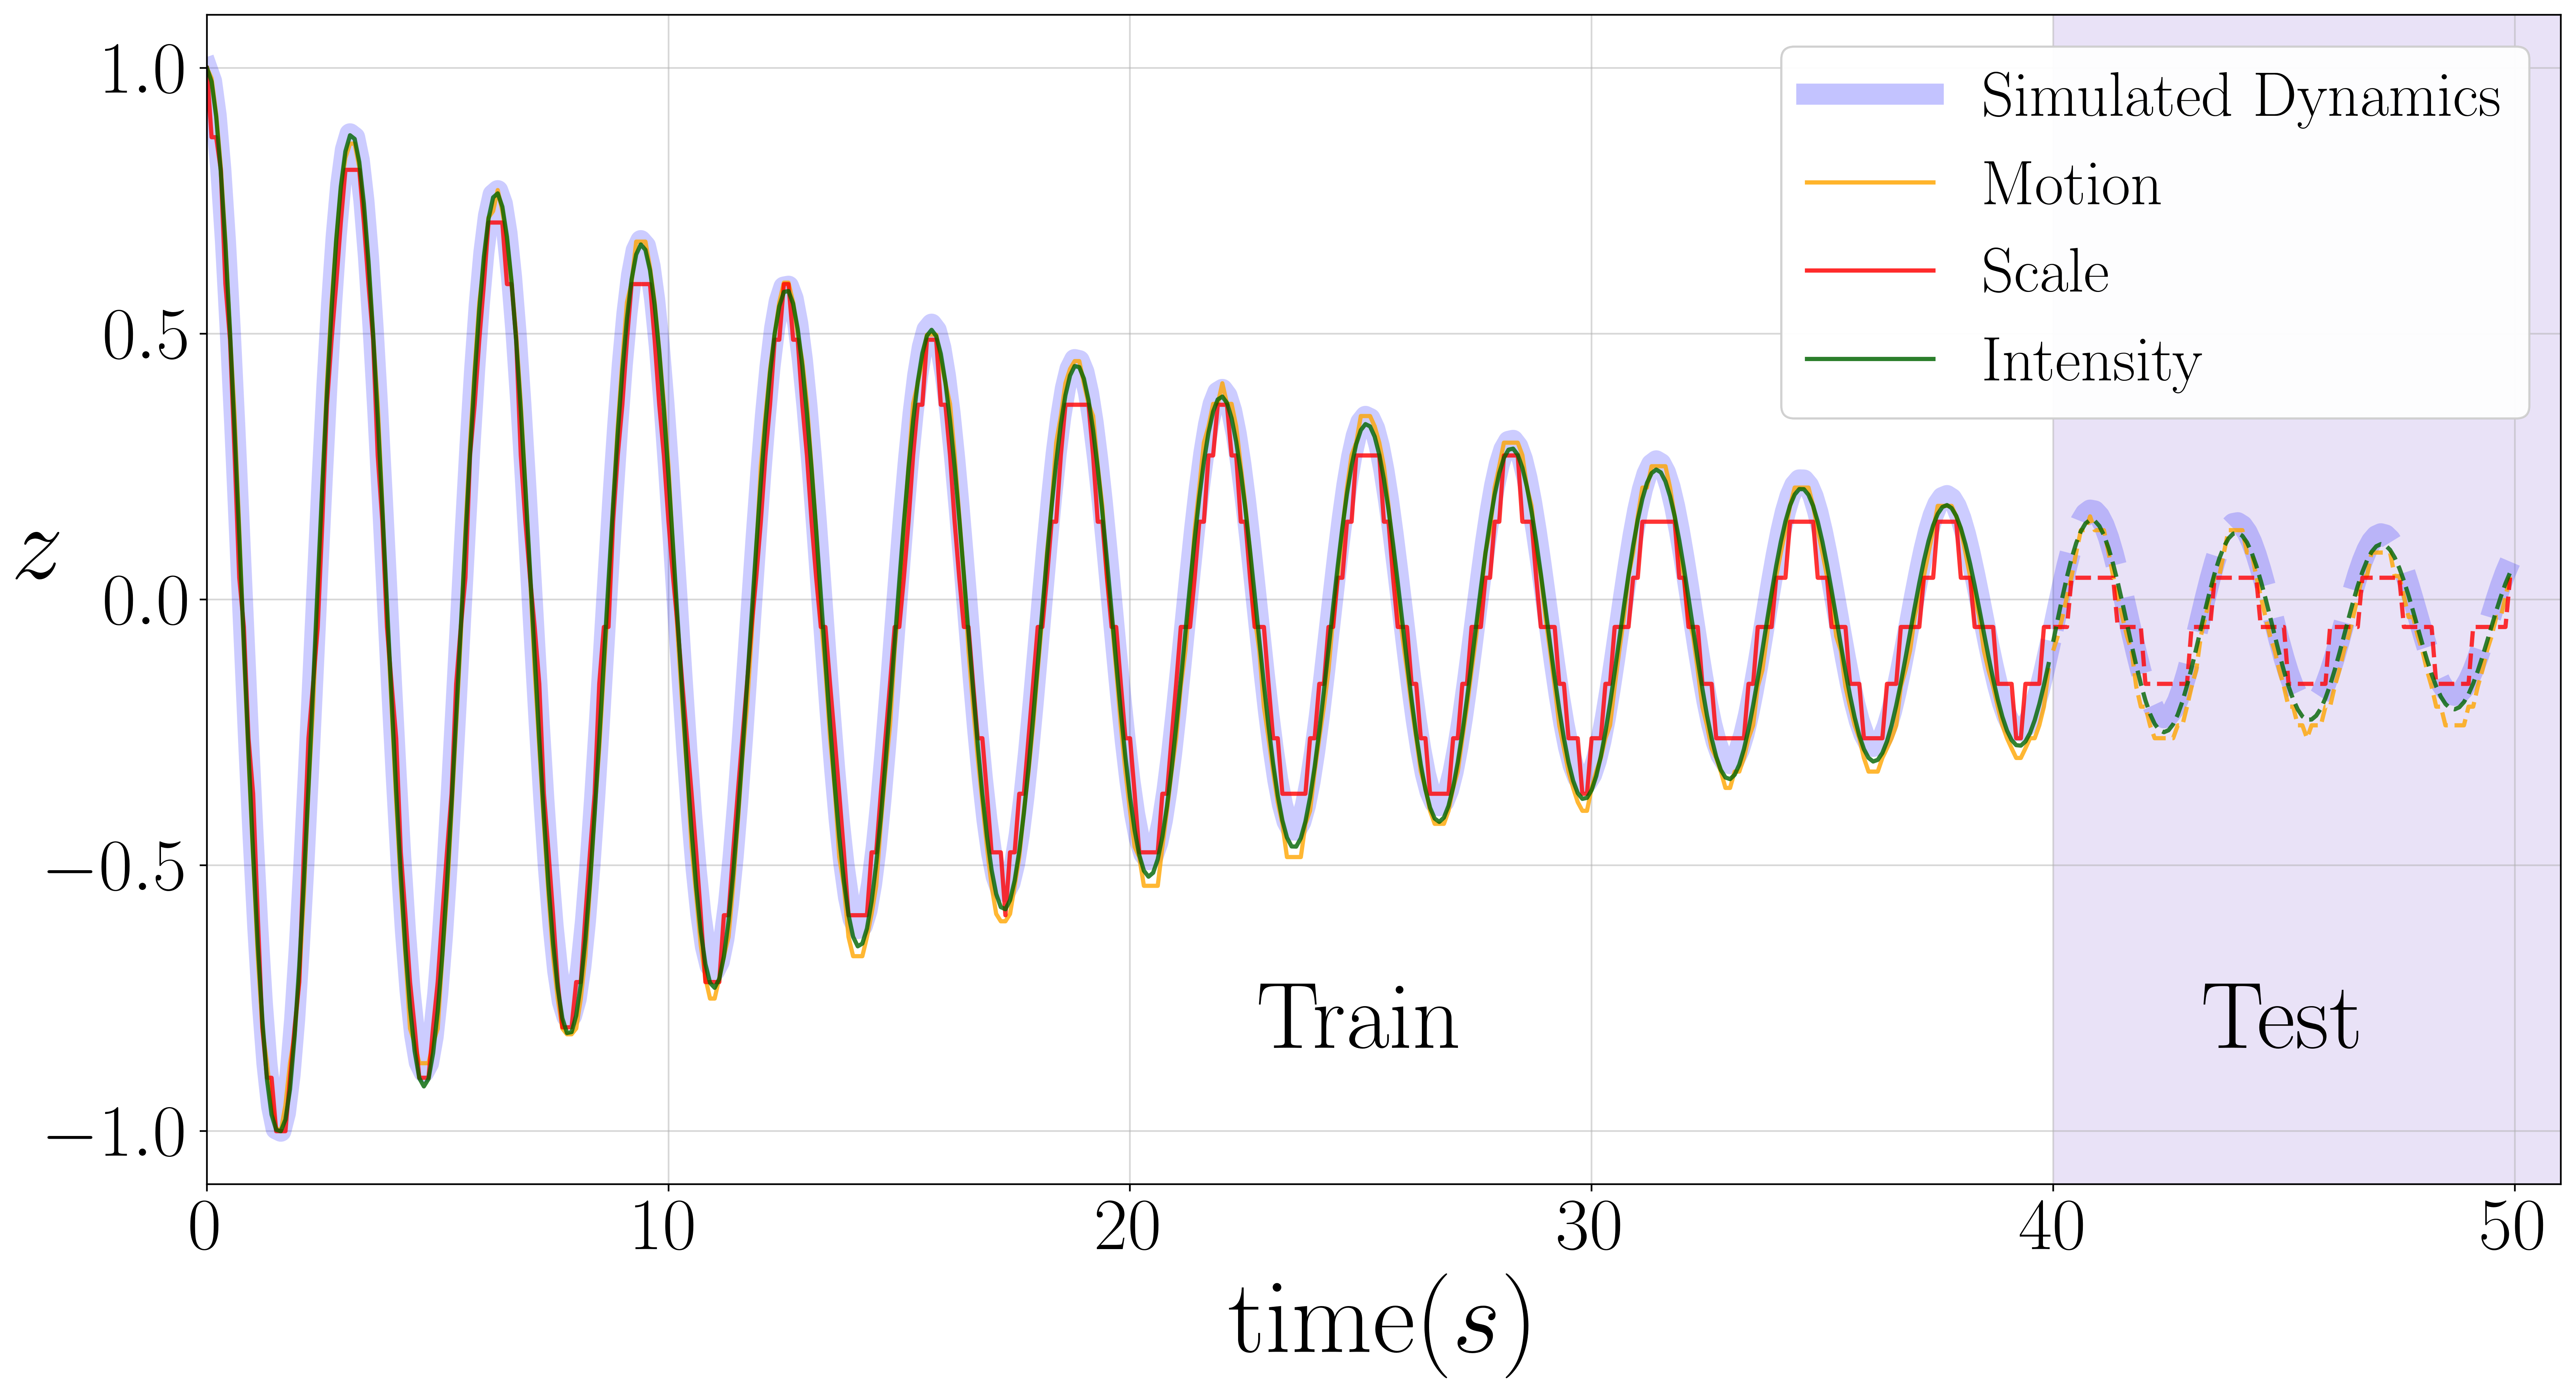

In [65]:
cp.plotMultiple( X,  'epoch', 'z','Latent Space', 'LatenSpacePred_new', styleDark = False, show  = True )

### Error

In [267]:
def normalize(z, a):
    mz = np.mean(z)
    ma = np.mean(a)

    mz = np.min(z)
    ma = np.min(a)

    max_z = np.max(z)
    max_a = np.max(a)

    m = (max_a - ma)/(max_z - mz)
    n = ma - m*mz

    return m*z #+ n
def normalize_1_0(z):

    max_z = np.max(z)
    mz = np.min(z)
    

    m = (2)/(max_z - mz)

    b = 1 - m*max_z

    return m*z + b

def moving_average(signal, window_size):
    window = np.ones(window_size) / window_size
    return np.convolve(signal, window, mode='same')




t,a = genData.generateDynamics(max=1, min=0, dt = 0.1)

t = t[:-40]
a = a[:-40]
a = normalize_1_0(a)

n_samples = t.shape[0]
t_train = t[:int(n_samples*0.8)]
t_test = t[int(n_samples*0.8):]

a_train = a[:int(n_samples*0.8)]
a_test = a[int(n_samples*0.8):]

X = []

colors = ['b', 'orange', 'red', 'darkgreen', 'm', 'y', 'k', '#FFA500', '#800080', '#008080']
#colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf']
indx_color = 1
for dyn_type in ["Motion","Scale","Intensity"]:
#for dyn_type in ["Intensity"]:
    if dyn_type == "Motion":
        data_folder = np.load('Data/dataset_motion.npy')
        model = latentEncoder_m
    if dyn_type == "Scale":
        data_folder = np.load('Data/dataset_Scale_nu.npy')
        model = latentEncoder_s
    if dyn_type == "Intensity":
        model = latentEncoder_I
        data_folder = np.load('Data/dataset_intensity.npy')

    data_train = data_folder
    dt = 0.2
    dataloader  = loader.getLoader_folder(data_train, split=False)

    z = None

    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)


    for data in dataloader:

        input_Data, out_Data = data

        x0 = input_Data

        x0 = x0.to(device=device, dtype=torch.float)

        x2 = out_Data.to(device=device, dtype=torch.float)

        outputs = model(x0)
        z2_encoder, z2_phys=outputs

        if z is None:
            z = z2_encoder.detach().cpu().numpy()[0][0]
        else:
            z = np.vstack((z,z2_encoder.detach().cpu().numpy()[0][0]))

    z = normalize_1_0(z)
    if z[0] < 0:
        z = -z

    z = z.reshape(-1)    

    error = np.abs(z-a)

    window_size = 15  # Window size (must be odd)
    poly_order = 2    # Polynomial order
    #error_smooth = savgol_filter(error, window_size, poly_order)
    error_smooth = moving_average(error, window_size)

    error_train = error[:int(n_samples*0.8)]
    error_test = error[int(n_samples*0.8):]
    error_smooth_train = error_smooth[:int(n_samples*0.8)]
    error_smooth_test = error_smooth[int(n_samples*0.8):]

    

 
    
    X.append( { 'x': t_train, 'y': error_train, 'label': '_nolegend_' , 'alpha':0.3, 'linewidth' :1.0, 'color':colors[indx_color]  } )
    X.append( { 'x': t_test, 'y': error_test, 'label': '_nolegend_' , 'alpha':0.3, 'linewidth' :1.0 , 'linestyle': '--', 'color':colors[indx_color]   } )
    X.append( { 'x': t_train, 'y': error_smooth_train, 'label': dyn_type , 'alpha':1.0, 'linewidth' :2.5, 'color':colors[indx_color]  } )
    X.append( { 'x': t_test, 'y': error_smooth_test, 'label': '_nolegend_' , 'alpha':1.0, 'linewidth' :2.5 , 'linestyle': '--', 'color':colors[indx_color]   } )

    indx_color += 1

c:\Users\aleja\Documents\TUDelft\Repository\Vphys\src\custom_plots.py:69: UserWarning: The label '_nolegend_' of <matplotlib.lines.Line2D object at 0x000001A0B34C40D0> starts with '_'. It is thus excluded from the legend.
  first_legend = ax.legend(handles=lines[:-2], fontsize="30", loc ="upper right")
c:\Users\aleja\Documents\TUDelft\Repository\Vphys\src\custom_plots.py:69: UserWarning: The label '_nolegend_' of <matplotlib.lines.Line2D object at 0x000001A0B34C4310> starts with '_'. It is thus excluded from the legend.
  first_legend = ax.legend(handles=lines[:-2], fontsize="30", loc ="upper right")
c:\Users\aleja\Documents\TUDelft\Repository\Vphys\src\custom_plots.py:69: UserWarning: The label '_nolegend_' of <matplotlib.lines.Line2D object at 0x000001A0B34C4850> starts with '_'. It is thus excluded from the legend.
  first_legend = ax.legend(handles=lines[:-2], fontsize="30", loc ="upper right")
c:\Users\aleja\Documents\TUDelft\Repository\Vphys\src\custom_plots.py:69: UserWarning: T

<Figure size 640x480 with 0 Axes>

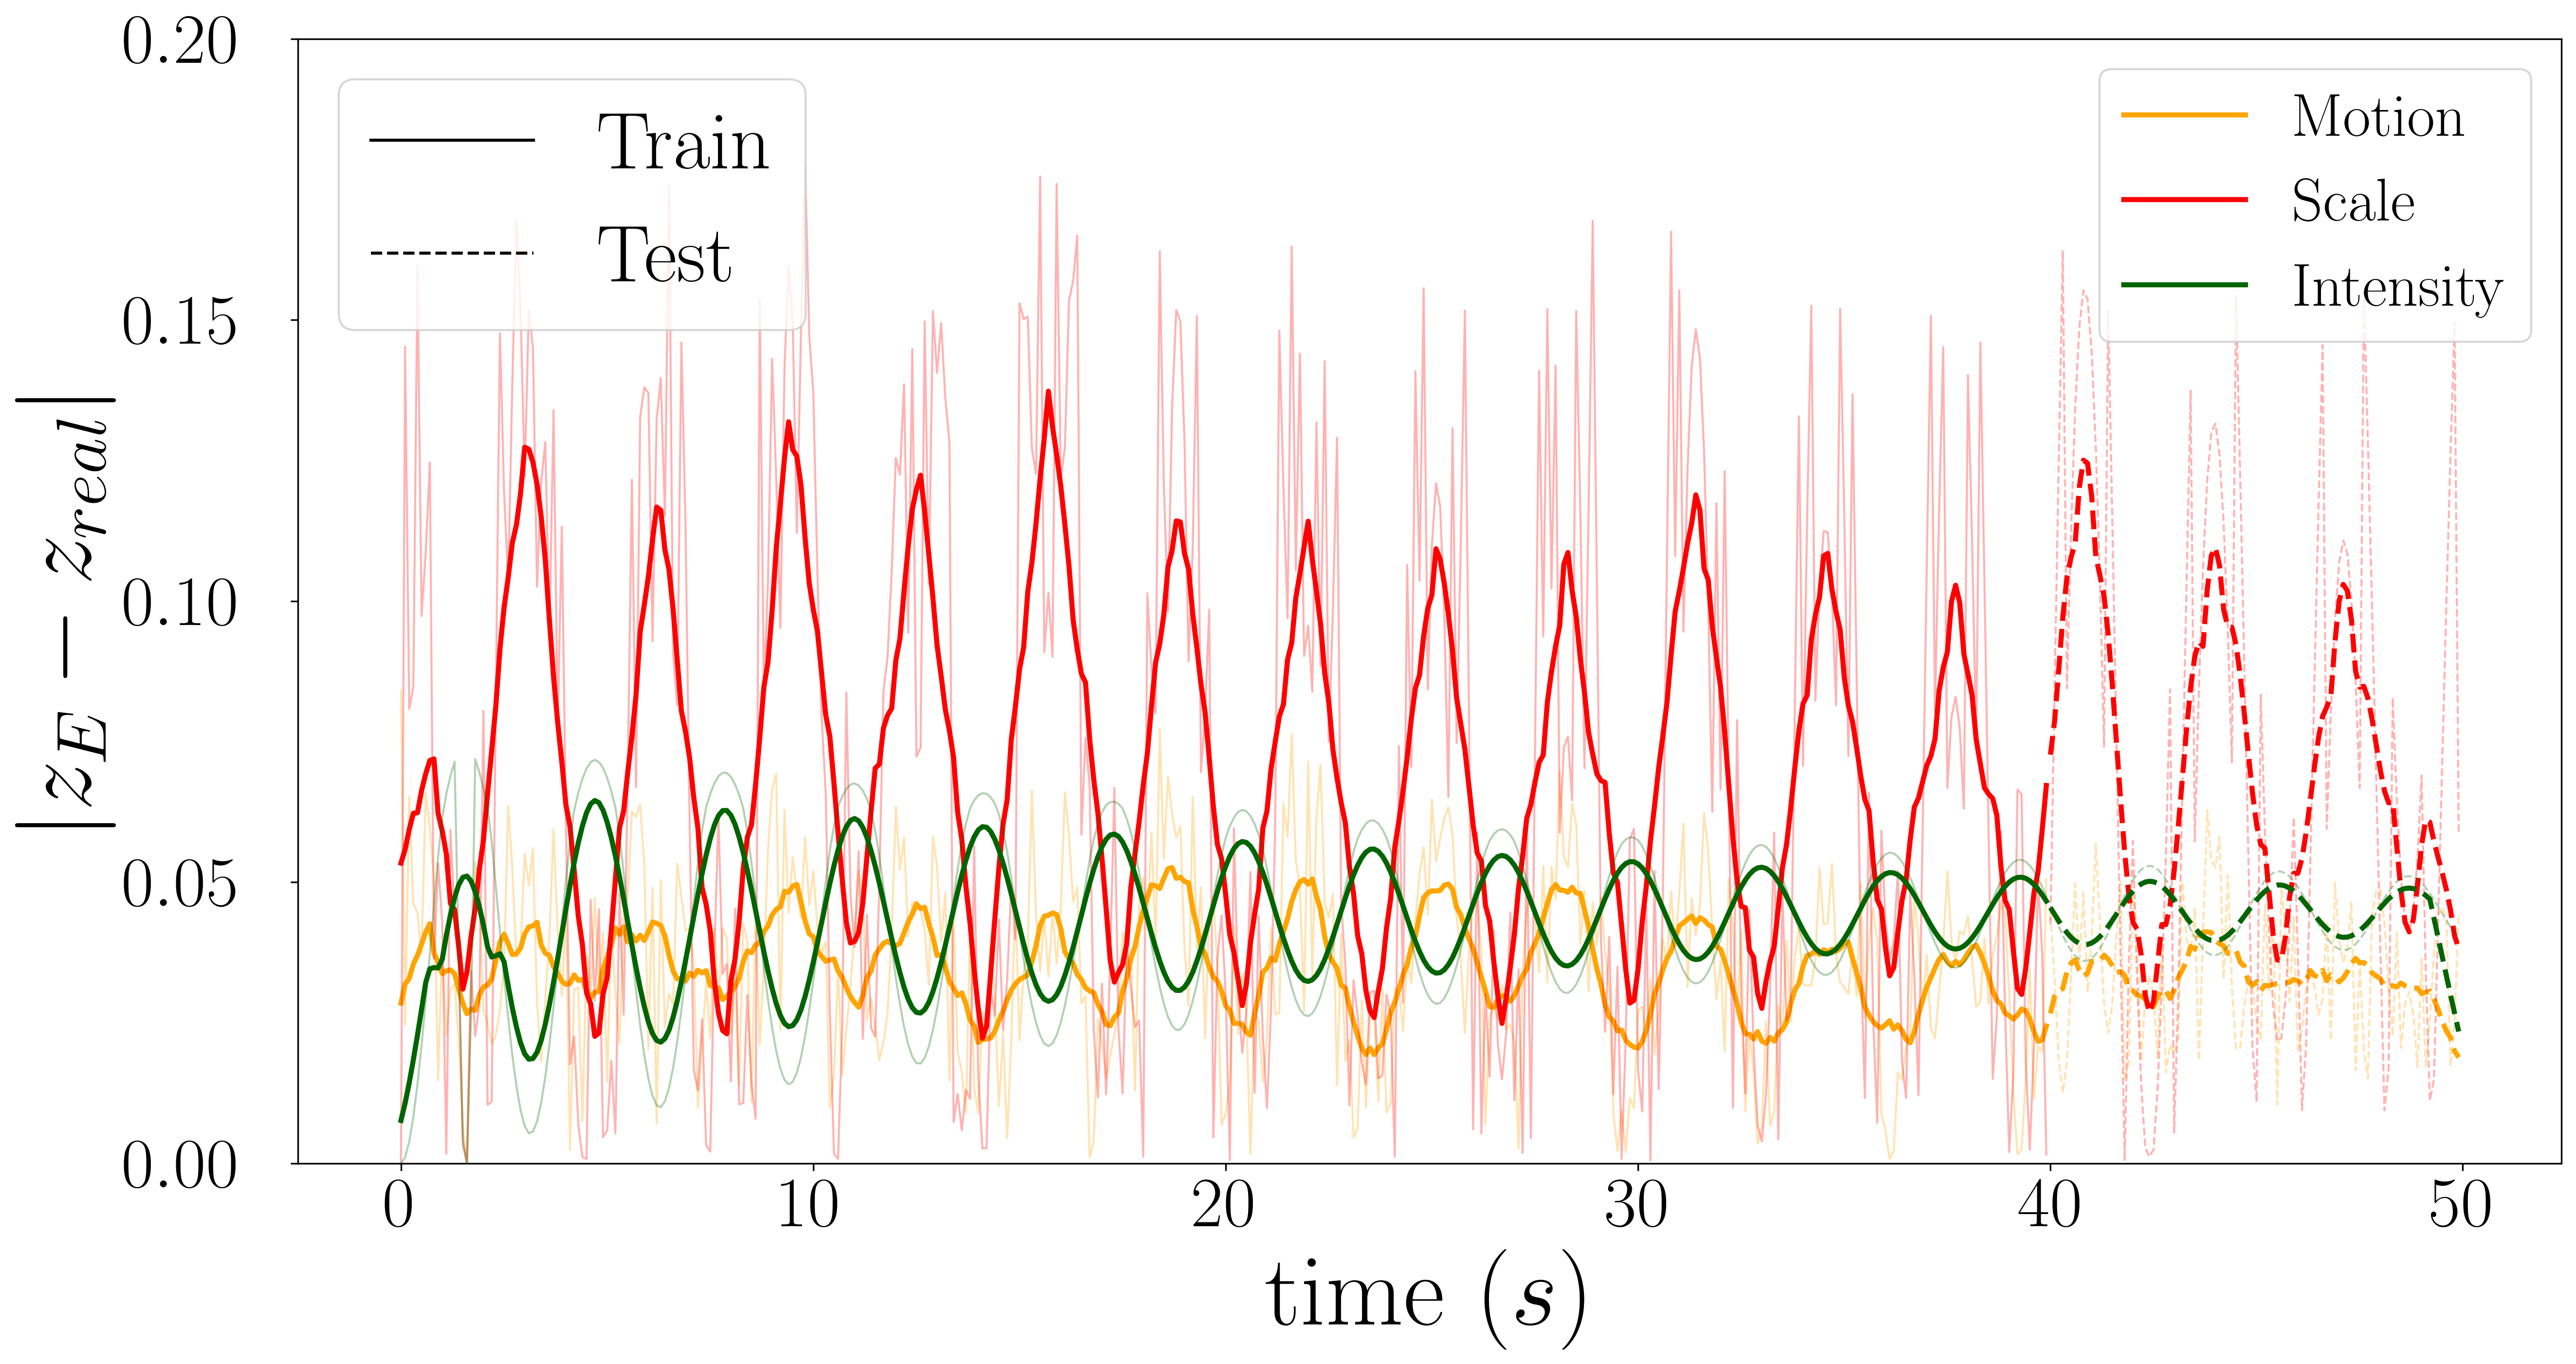

In [269]:
cp.plotMultiple( X,  'time(s)', 'value','error Latent Space', 'errLatenSpacePred', styleDark = False, show  = True )

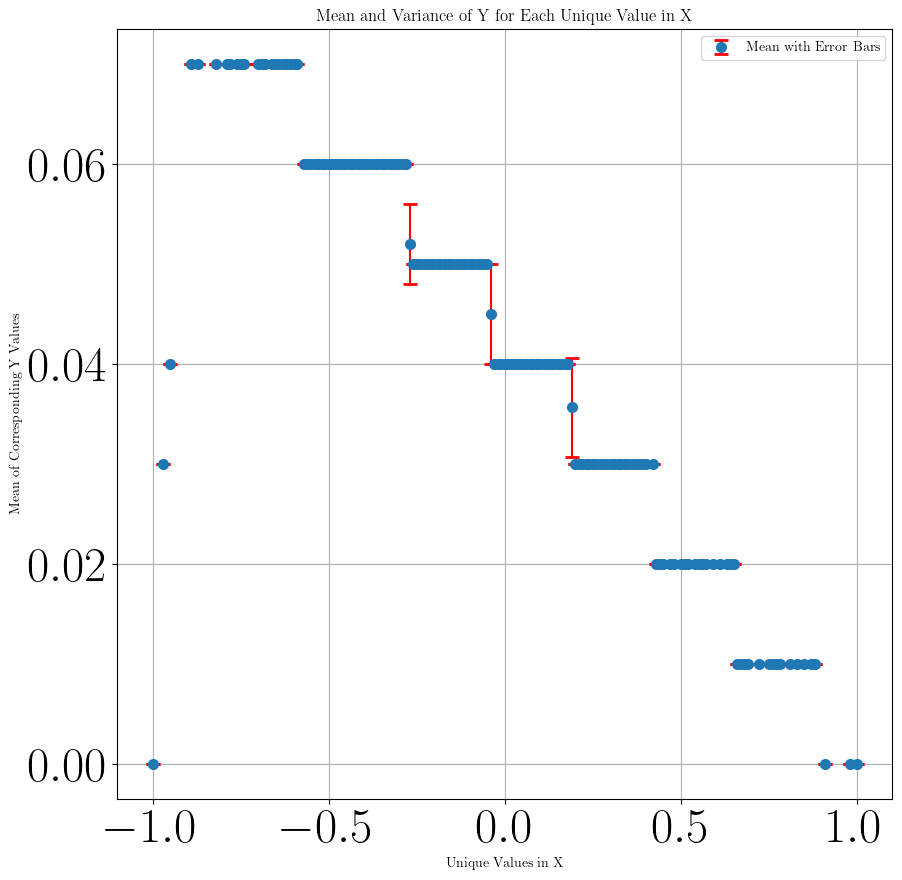

In [270]:
X = a_train
Y = z_train

X = np.array(X).round(2)
Y = np.array(Y).round(2)

unique_values = np.unique(X)

# Calculate mean and variance of Y for each unique value in X
means = []
variances = []
for value in unique_values:
    indices = np.where(X == value)
    y_values = Y[indices]
    means.append(np.mean(y_values))
    variances.append(np.var(y_values))

# Convert to numpy arrays for plotting
means = np.array(means)
variances = np.array(variances)
errors = np.sqrt(variances)  # Standard deviation for error bars

# Plotting the results
plt.figure(figsize=(10, 10))
plt.errorbar(unique_values, means, yerr=errors, fmt='o', ecolor='r', capsize=5, capthick=2,  mew=2, label='Mean with Error Bars')
plt.xlabel('Unique Values in X')
plt.ylabel('Mean of Corresponding Y Values')
plt.title('Mean and Variance of Y for Each Unique Value in X')
plt.legend()
plt.grid(True)
plt.show()

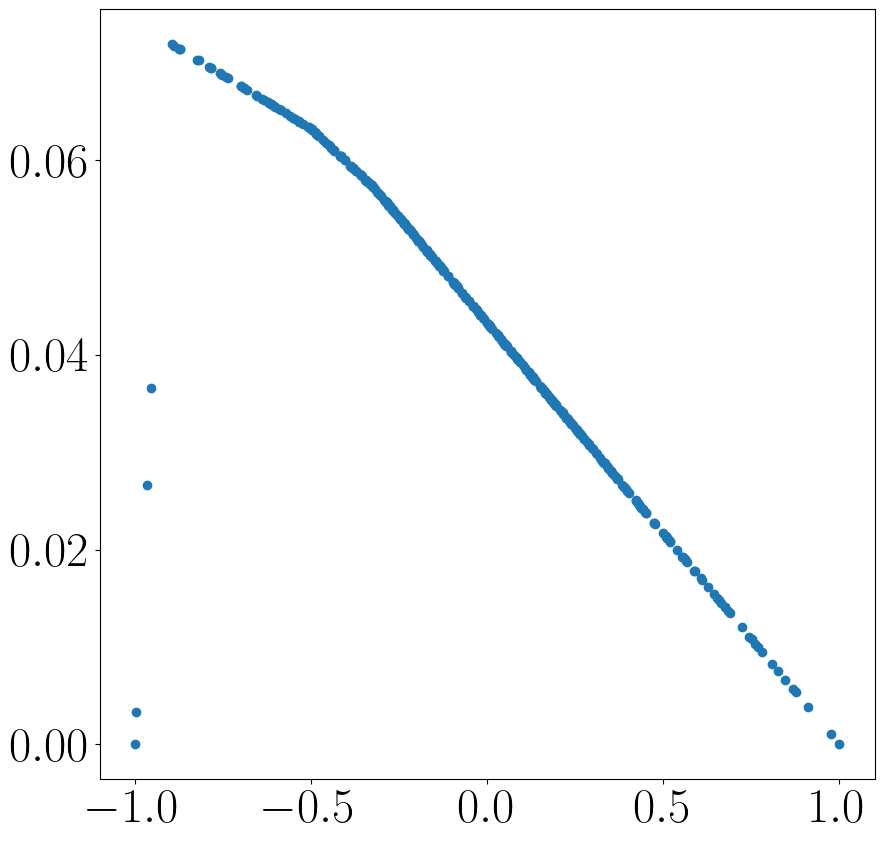

In [272]:
X = a_train
Y = z_train


plt.figure(figsize=(10, 10))
plt.plot(X, Y, 'o', label='Data Points')
plt.show()

In [67]:
def normalize(z, a):
    mz = np.mean(z)
    ma = np.mean(a)

    mz = np.min(z)
    ma = np.min(a)

    max_z = np.max(z)
    max_a = np.max(a)

    m = (max_a - ma)/(max_z - mz)
    n = ma - m*mz

    return m*z #+ n
def normalize_1_0(z):

    max_z = np.max(z)
    mz = np.min(z)
    

    m = (2)/(max_z - mz)

    b = 1 - m*max_z

    return m*z + b

def moving_average(signal, window_size):
    window = np.ones(window_size) / window_size
    return np.convolve(signal, window, mode='same')




t,a = genData.generateDynamics(max=1, min=0, dt = 0.1)

t = t[:-40]
a = a[:-40]
a = normalize_1_0(a)

n_samples = t.shape[0]
t_train = t[:int(n_samples*0.8)]
t_test = t[int(n_samples*0.8):]

a_train = a[:int(n_samples*0.8)]
a_test = a[int(n_samples*0.8):]

X = []

colors = ['b', 'orange', 'red', 'darkgreen', 'm', 'y', 'k', '#FFA500', '#800080', '#008080']
#colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf']
indx_color = 1
for dyn_type in ["Motion","Scale","Intensity"]:
#for dyn_type in ["Intensity"]:
    if dyn_type == "Motion":
        data_folder = np.load('Data/dataset_motion.npy')
        model = latentEncoder_m
    if dyn_type == "Scale":
        data_folder = np.load('Data/dataset_Scale_nu.npy')
        model = latentEncoder_s
    if dyn_type == "Intensity":
        model = latentEncoder_I
        data_folder = np.load('Data/dataset_intensity.npy')

    data_train = data_folder
    dt = 0.2
    dataloader  = loader.getLoader_folder(data_train, split=False)

    z = None

    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)


    for data in dataloader:

        input_Data, out_Data = data

        x0 = input_Data

        x0 = x0.to(device=device, dtype=torch.float)

        x2 = out_Data.to(device=device, dtype=torch.float)

        outputs = model(x0)
        z2_encoder, z2_phys, z_norm=outputs

        if z is None:
            z = z2_encoder.detach().cpu().numpy()[0][0]
        else:
            z = np.vstack((z,z2_encoder.detach().cpu().numpy()[0][0]))

    z = normalize_1_0(z)
    if z[0] < 0:
        z = -z
        
    z = z.reshape(-1)

    z_train = z[:int(n_samples*0.8)]
    z_test = z[int(n_samples*0.8):]

    coefficients = np.polyfit(a_train, z_train, 1)
    slope, intercept = coefficients

    # Calculate predicted Y values
    z_train_l = slope * a_train + intercept

    coefficients = np.polyfit(a_test, z_test, 1)
    slope, intercept = coefficients
    z_test_l = slope * a_test + intercept


    X.append( { 'x': a_train, 'y': z_train, 'label': '_nolegend_' , 'alpha':0.3, 'linewidth' :2.0, 'color':colors[indx_color], 'plot_type':'scatter'  } )
    #X.append( { 'x': a_test, 'y': z_test, 'label': '_nolegend_' , 'alpha':0.3, 'linewidth' :2.0 , 'linestyle': '--', 'color':colors[indx_color] , 'plot_type':'scatter'   } )
    X.append( { 'x': a_train, 'y': z_train_l, 'label': dyn_type , 'alpha':1.0, 'linewidth' :2.5, 'color':colors[indx_color]  } )
    #X.append( { 'x': a_test, 'y': z_test_l, 'label': '_nolegend_' , 'alpha':1.0, 'linewidth' :2.5 , 'linestyle': '--', 'color':colors[indx_color]   } )


    

 
    indx_color += 1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 640x480 with 0 Axes>

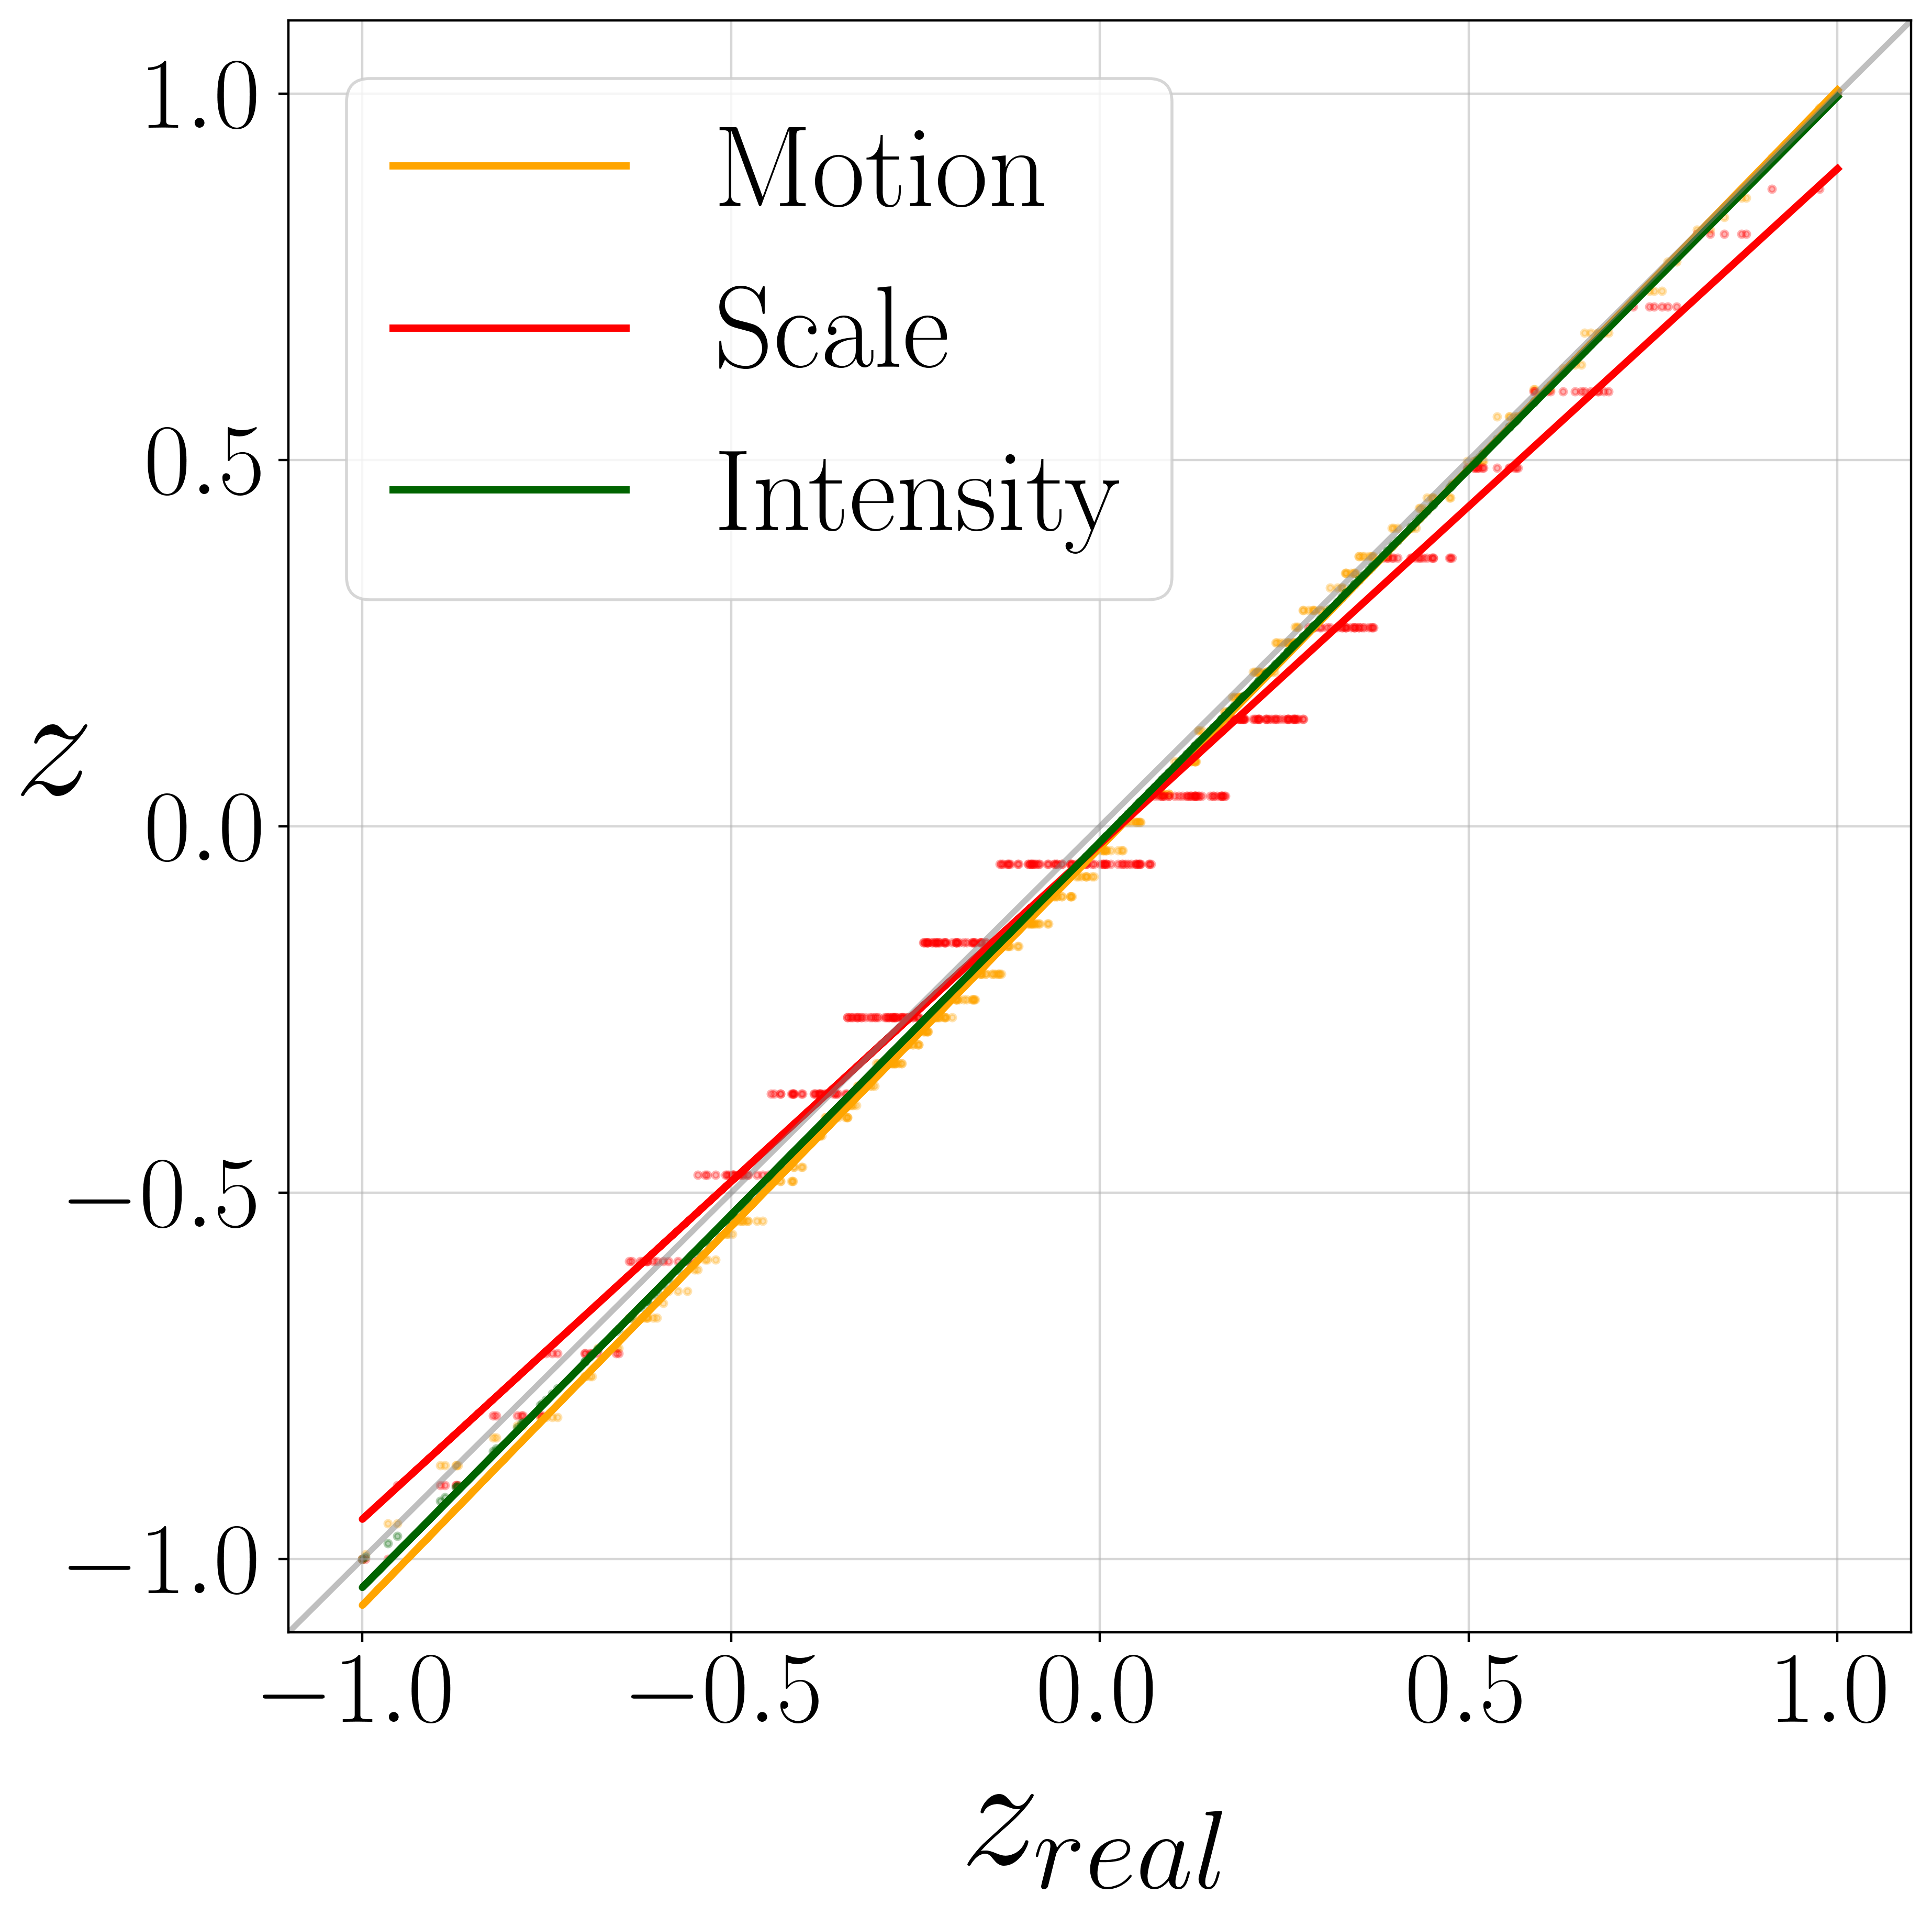

In [91]:
cp.plotMultiple( X,  'time(s)', 'value','error Latent Space', 'errLatenSpacePred', styleDark = False, show  = True )

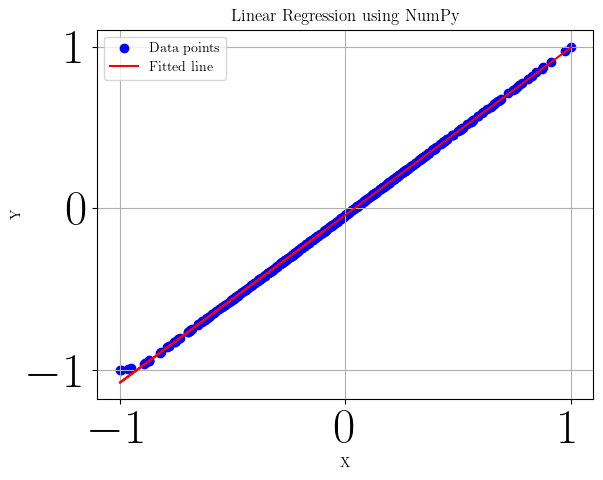

In [274]:
X = a_train
Y = z_train

# Perform linear regression using NumPy's polyfit
coefficients = np.polyfit(X, Y, 1)
slope, intercept = coefficients

# Calculate predicted Y values
Y_pred = slope * X + intercept

# Plot the data and the fitted line
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, Y_pred, color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression using NumPy')
plt.grid(True)
plt.show()

### MM

Dynamics type:  Intensity
Initial value:  -10.0
Using device: cuda
Initial Loss 	 training loss: 1.8325018882751465 	 validation loss: 3.0179691314697266
best model a 3.8171298503875732
best last a 3.8615288734436035
best model b 0.08927842974662781
best last b 0.08442231267690659
Best gamma1:  3.8615288734436035
Best gamma2:  0.08442231267690659
Initial value:  -5.0
Using device: cuda
Initial Loss 	 training loss: 1.4464941322803497 	 validation loss: 2.5923047065734863
best model a 3.8955094814300537
best last a 3.883559226989746
best model b 0.0979703739285469
best last b 0.10357295721769333
Best gamma1:  3.883559226989746
Best gamma2:  0.10357295721769333
Initial value:  -1.0
Using device: cuda
Initial Loss 	 training loss: 1.515847533941269 	 validation loss: 2.7007572650909424
best model a 3.9122071266174316
best last a 3.8782708644866943
best model b 0.07992973178625107
best last b 0.08363915979862213
Best gamma1:  3.8782708644866943
Best gamma2:  0.08363915979862213
Initial val

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 640x480 with 0 Axes>

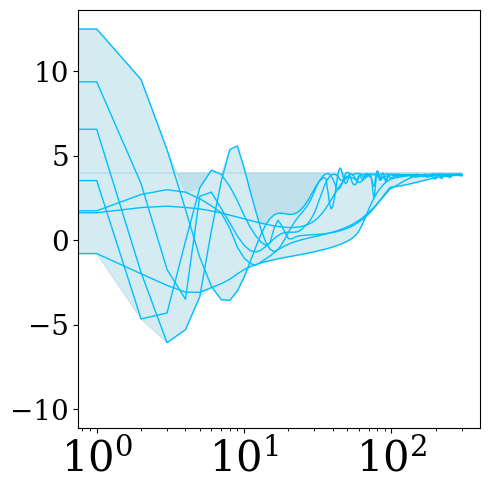

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


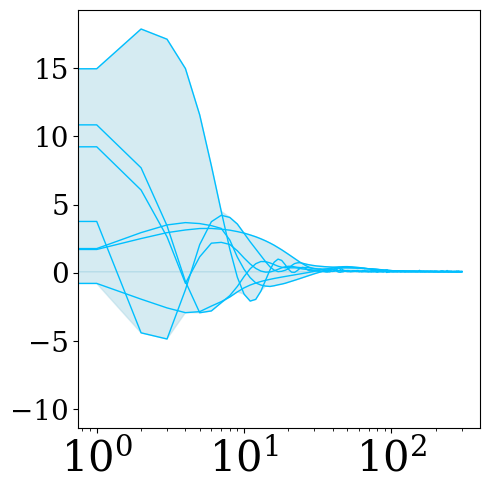

Best gamma1:  3.8766719613756453 \pm 0.022436358597632097
Best gamma2:  0.08690039600644793 \pm 0.007245389360185002


In [337]:
#for dyn_type in ["Motion","Scale","Intensity"]:
for dyn_type in ["Intensity"]:
    print("Dynamics type: ", dyn_type)

    if dyn_type == "Motion":
        data_folder = np.load('Data/dataset_motion.npy')
    if dyn_type == "Scale":
        data_folder = np.load('Data/dataset_Scale_nu.npy')
    if dyn_type == "Intensity":
        data_folder = np.load('Data/dataset_intensity.npy')

    data_train = data_folder
    dt = 0.2
    train_dataloader, test_dataloader, train_x, val_x  = loader.getLoader_folder(data_train, split=True)


    a = []
    b = []

    gamma1 = []	
    gamma2 = []

    plt.figure()


    for inits in [ -10.0, -5.0, -1.0,0.0, 1.0, 5.0, 10.0]:

        print("Initial value: ", inits)

        latentEncoder = mainmodel.EndPhys(dt = dt,  
                            pmodel = "Damped_oscillation",
                            init_phys = inits, 
                            initw=True)

        latentEncoder, log  = train.train(latentEncoder, 
                                        train_dataloader, 
                                        test_dataloader,
                                        init_phys = inits,                                 
                                        loss_name='latent_loss')
        
        gamma1.append(latentEncoder.pModel.alpha[0].detach().cpu().numpy().item())
        gamma2.append(latentEncoder.pModel.beta[0].detach().cpu().numpy().item())

        print("Best gamma1: ", latentEncoder.pModel.alpha[0].detach().cpu().numpy().item())
        print("Best gamma2: ", latentEncoder.pModel.beta[0].detach().cpu().numpy().item())
        
        a.append( [element["alpha"] for element in log  ])
        b.append( [element["beta"] for element in log  ] )

    a = np.array(a)
    b = np.array(b)
    cp.plotAreas(a, 3.99, dyn_type+"_gamma1")
    cp.plotAreas(b, 0.08, dyn_type+"_gamma2")

    gamma1 = np.array(gamma1)
    gamma2 = np.array(gamma2)

    print("Best gamma1: ", gamma1.mean() , "\pm", gamma1.std())
    print("Best gamma2: ", gamma2.mean() , "\pm", gamma2.std())

In [325]:
gamma1 = gamma1[gamma1 != 0.0]
gamma2 = gamma2[gamma2 != 0.0]
print(gamma1)
print(gamma2)

gamma1 = np.array(gamma1)
gamma2 = np.array(gamma2)

print("Best gamma1: ", gamma1.mean() , "\pm", gamma1.std())
print("Best gamma2: ", gamma2.mean() , "\pm", gamma2.std())

[3.95210648 3.94166565 3.93867278 3.95041895 3.93446565 3.95559692
 3.93336344]
[0.14233992 0.15430722 0.13811378 0.15380447 0.14218201 0.14739411
 0.13099484]
Best gamma1:  3.9437556947980608 \pm 0.008270925936692049
Best gamma2:  0.14416233343737467 \pm 0.007778582753766319


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


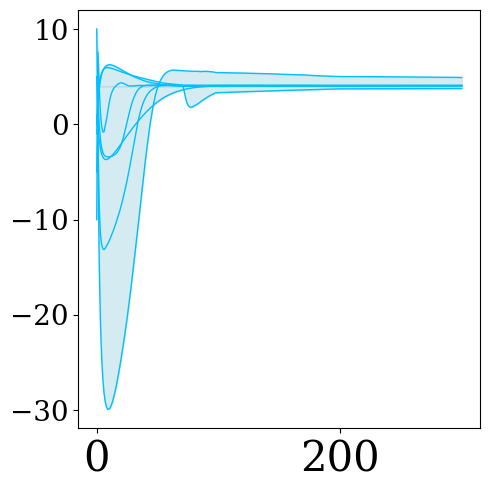

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


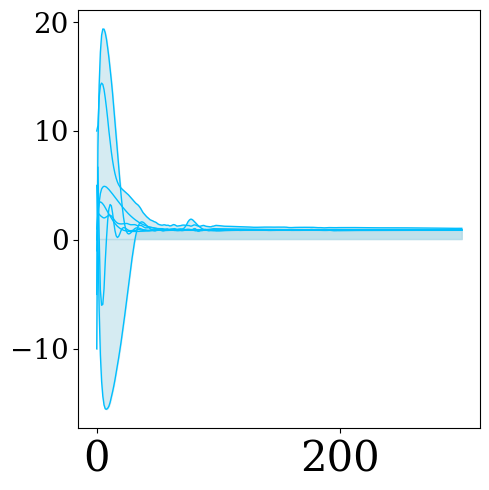

In [335]:
cp.plotAreas(a, 3.99, dyn_type+"_gamma1")
cp.plotAreas(b, 0.08, dyn_type+"_gamma2")

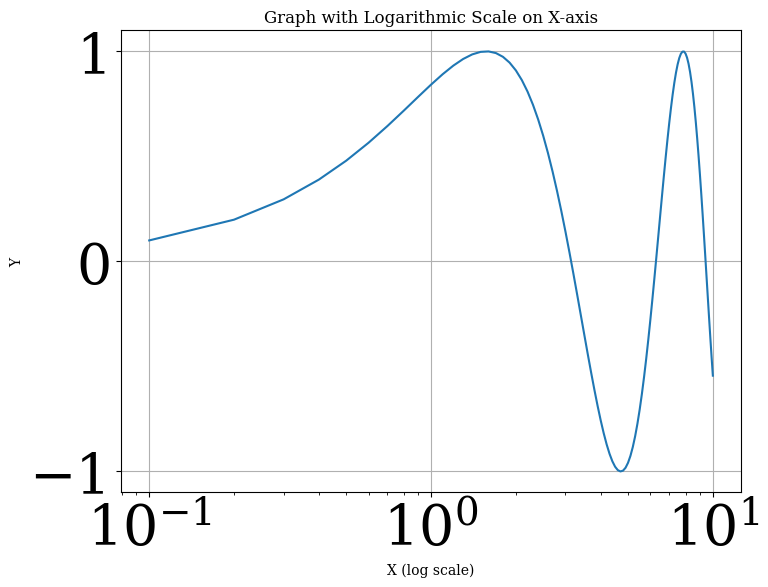

In [300]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
x = np.linspace(0.1, 10, 100)
y = np.sin(x)

# Plot the graph with log scale on the x-axis
plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.xscale('log')  # Set logarithmic scale for x-axis
plt.xlabel('X (log scale)')
plt.ylabel('Y')
plt.title('Graph with Logarithmic Scale on X-axis')
plt.grid(True)
plt.show()

In [308]:
print(a[0][0])
print(b[0][0])

-10.0
-10.0


### first order exp

In [2]:
data_folder = np.load('Data/dataset_intensity_1storder_h.npy')

data_train = data_folder

(200, 20, 1, 50, 50)
0.9819495316140996


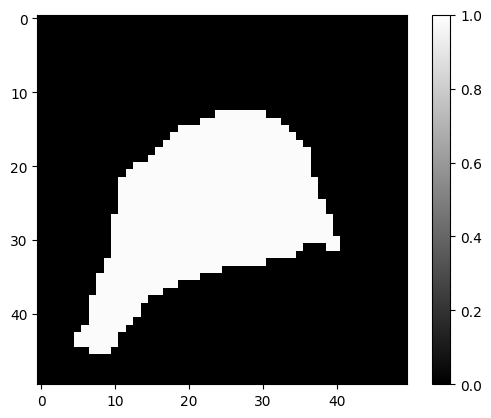

0.9819495316140996
torch.Size([200, 20, 1, 50, 50])
tensor(0.9819)


In [3]:
print(data_train.shape)
img = data_train[0,0,0]
print(img.max())
plt.imshow(img, cmap='gray', vmin=0, vmax=1)
plt.colorbar()
plt.show()

print(data_train.max())

img_torch = torch.from_numpy(data_train).float()
print(img_torch.shape)
print(img_torch.max())

In [8]:
def visacc(data_train):

    visual_loader  = loader.getLoader_folder(data_train, split=False)

    best_model =  mainmodel.EndPhys(dt = dt,  
                                  in_size=50,
                            pmodel = "dyn_1storder",
                            init_phys = 3.0, 
                            initw=True)

    checkpoint = torch.load('best-model-parameters.pt')
    best_model.load_state_dict(checkpoint)


    

    z = None

    device = "cuda" if torch.cuda.is_available() else "cpu"

    print("Device: ", device)
    #model.to(device)
    best_model.to(device)

    z2_encoder_list = []
    z2_phys_list = []


    for data in visual_loader:

        input_Data, out_Data = data

        x0 = input_Data

        x0 = x0.to(device=device, dtype=torch.float)

        x2 = out_Data.to(device=device, dtype=torch.float)

        outputs = best_model(x0)
        z2_encoder, z2_phys,_=outputs

        z2_encoder_list.append(z2_encoder.detach().cpu().numpy()[0][0])
        z2_phys_list.append(z2_phys.detach().cpu().numpy()[0][0])

    z2_encoder_list = np.array(z2_encoder_list)
    z2_phys_list = np.array(z2_phys_list)

    z2_encoder_list = z2_encoder_list.reshape(-1)*-1
    z2_phys_list = z2_phys_list.reshape(-1)*-1

    #t = np.linspace(0, 1, 100)
    #a = np.exp(-2*t)

    # t = np.linspace(0,3,100)
    # a= np.exp(-t)*(3-2*np.exp(t/2))**2

    # max_a = a.max()
    # min_a = a.min()

    # m = (max_a - min_a)/(z2_encoder_list.max() - z2_encoder_list[0].max())
    # n = max_a - m*z2_encoder_list.max()

    # z2_encoder_list = m*z2_encoder_list + n

    # z2_phys_list = m*z2_phys_list + n+.1

    # t = (t/t.max())*z2_encoder_list.shape[0]
    #a = a*3.5-1


    plt.figure()
    plt.plot(z2_encoder_list, label = "Encoder")
    plt.plot(z2_phys_list, label = "Phys")
    #plt.plot(t[::4], a[::4], label = "Real")
    plt.legend()
    plt.show()

In [14]:
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:2000"
torch.cuda.empty_cache() 
torch.manual_seed(0)

for dyn_type in ["intensity"]:
    print("Dynamics type: ", dyn_type)

    
    data_folder = np.load('Data/dataset_'+dyn_type+'_1storder_h.npy')

    data_train = data_folder
    #data_train = np.repeat(data_train, 5, axis=0)
    print(data_train.shape)
    dt = 0.05
    train_dataloader, test_dataloader, train_x, val_x  = loader.getLoader_folder(data_train, split=True)


    a = []
    b = []

    gamma1 = []	
    gamma2 = []

    plt.figure()


    #for inits in [ -10.0, -5.0, -1.0, 0.0, 1.0, 5.0, 10.0]:
    lr=[0.5, 0.5]
    lr=[0.05, 0.05, 0.05]
    indx = 0
    for inits in [ 1.0,0.0, 1.5]:


        print("Initial value: ", inits)

        latentEncoder = mainmodel.EndPhys(dt = dt,  
                            pmodel = "dyn_1storder",
                            init_phys = inits, 
                            initw=True)

        latentEncoder, log, params  = train.train(latentEncoder, 
                                        train_dataloader, 
                                        test_dataloader,
                                        init_phys = lr[indx],                                 
                                        loss_name='latent_loss')
        indx += 1
        
        #visacc(data_train)
        
        gamma1.append(params[0])
        gamma2.append(params[1])

        # gamma1.append(latentEncoder.pModel.alpha[0].detach().cpu().numpy().item())
        # gamma2.append(latentEncoder.pModel.beta[0].detach().cpu().numpy().item())

        #print("Best gamma1: ", latentEncoder.pModel.alpha[0].detach().cpu().numpy().item())
        #print("Best gamma2: ", latentEncoder.pModel.beta[0].detach().cpu().numpy().item())
        
        a.append( [element["alpha"] for element in log  ])
        b.append( [element["beta"] for element in log  ] )

    gamma1 = np.array(gamma1)
    gamma2 = np.array(gamma2)

    print("Best gamma1: ", gamma1.mean() , "\pm", gamma1.std())
    print("Best gamma2: ", gamma2.mean() , "\pm", gamma2.std())

Dynamics type:  intensity
(200, 20, 1, 50, 50)
Initial value:  1.0
dt 0.05
Using device: cuda


Initial Loss 	 training loss: 4.148271083831787 	 validation loss: 4.177036762237549
epoch: 10 	 training loss: 1.3331722021102905 	 validation loss: 1.2196919322013855
epoch: 20 	 training loss: 1.1555309057235719 	 validation loss: 1.1450472474098206
epoch: 30 	 training loss: 1.1506577014923096 	 validation loss: 1.1145752668380737
epoch: 40 	 training loss: 1.132420825958252 	 validation loss: 1.120721161365509
epoch: 50 	 training loss: 1.1314328193664551 	 validation loss: 1.17940753698349
epoch: 60 	 training loss: 1.116795825958252 	 validation loss: 1.110951840877533
epoch: 70 	 training loss: 1.1070178747177124 	 validation loss: 1.1891365051269531
epoch: 80 	 training loss: 1.1127404928207398 	 validation loss: 1.1916899681091309
epoch: 90 	 training loss: 1.1143281221389771 	 validation loss: 1.1329797506332397
epoch: 100 	 training loss: 1.1217775344848633 	 validation loss: 1.127732753753662


best model a -0.9294303059577942
best last a -0.9067360162734985
best model b 1.0
best last b 1.0
Initial value:  0.0
dt 0.05
Using device: cuda


Initial Loss 	 training loss: 6.25797176361084 	 validation loss: 6.583539724349976
epoch: 10 	 training loss: 1.3067098617553712 	 validation loss: 1.3293853402137756
epoch: 20 	 training loss: 1.2358784437179566 	 validation loss: 1.2093499898910522
epoch: 30 	 training loss: 1.1582324981689454 	 validation loss: 1.120773732662201
epoch: 40 	 training loss: 1.1269405126571654 	 validation loss: 1.222787857055664
epoch: 50 	 training loss: 1.1273895740509032 	 validation loss: 1.107771635055542
epoch: 60 	 training loss: 1.1179964542388916 	 validation loss: 1.2335099577903748
epoch: 70 	 training loss: 1.1119655609130858 	 validation loss: 1.1568554639816284
epoch: 80 	 training loss: 1.115712547302246 	 validation loss: 1.1348194479942322
epoch: 90 	 training loss: 1.1112014770507812 	 validation loss: 1.1109906435012817
epoch: 100 	 training loss: 1.1054678201675414 	 validation loss: 1.1114782691001892


best model a -0.9623680710792542
best last a -0.9357038140296936
best model b 0.0
best last b 0.0
Initial value:  1.5
dt 0.05
Using device: cuda


Initial Loss 	 training loss: 5.14334135055542 	 validation loss: 5.118340969085693
epoch: 10 	 training loss: 1.2860934734344482 	 validation loss: 1.2613574862480164
epoch: 20 	 training loss: 1.1773199796676637 	 validation loss: 1.1429388523101807
epoch: 30 	 training loss: 1.1700062036514283 	 validation loss: 1.1215160489082336
epoch: 40 	 training loss: 1.1673875331878663 	 validation loss: 1.191584825515747
epoch: 50 	 training loss: 1.1471479177474975 	 validation loss: 1.1594905853271484
epoch: 60 	 training loss: 1.1250741243362428 	 validation loss: 1.1356813311576843
epoch: 70 	 training loss: 1.1340606689453125 	 validation loss: 1.1406716704368591
epoch: 80 	 training loss: 1.1230892896652223 	 validation loss: 1.1585744619369507
epoch: 90 	 training loss: 1.1157244205474854 	 validation loss: 1.1526165008544922
epoch: 100 	 training loss: 1.113975429534912 	 validation loss: 1.1216779947280884


best model a -0.9228237271308899
best last a -0.9400853514671326
best model b 1.5
best last b 1.5
Best gamma1:  -0.9382073680559794 \pm 0.017295787519570248
Best gamma2:  0.8333333333333334 \pm 0.6236095644623235


<Figure size 640x480 with 0 Axes>

dt 0.05
Device:  cuda


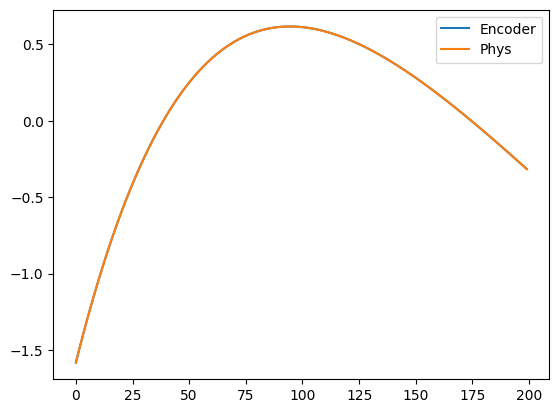

In [13]:
visacc(data_train)

1.0


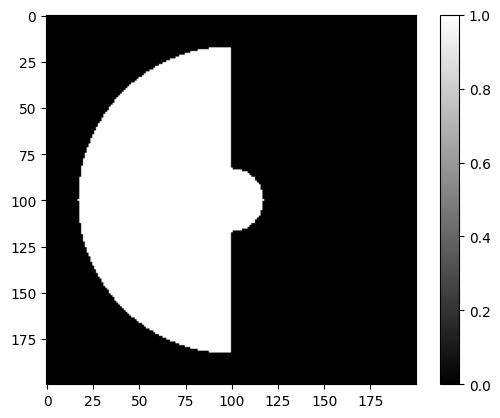

1.0


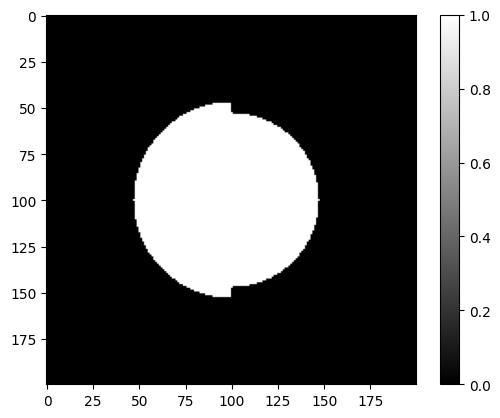

dt 0.02
Using device: cuda


Initial Loss 	 training loss: 3.8391167402267454 	 validation loss: 3.7760488986968994
epoch: 10 	 training loss: 0.9750497996807098 	 validation loss: 0.8585204680760702
epoch: 20 	 training loss: 0.45010773539543153 	 validation loss: 0.46142877141634625
epoch: 30 	 training loss: 0.3145445123314857 	 validation loss: 0.4522528648376465
epoch: 40 	 training loss: 0.2753723323345184 	 validation loss: 0.2468749483426412
epoch: 50 	 training loss: 0.3545063316822052 	 validation loss: 0.40293700496355694
epoch: 60 	 training loss: 0.2551975578069687 	 validation loss: 0.3371645212173462
epoch: 70 	 training loss: 0.3029997289180756 	 validation loss: 0.27579522132873535
epoch: 80 	 training loss: 0.31148535907268526 	 validation loss: 0.2926142563422521
epoch: 90 	 training loss: 0.3136528104543686 	 validation loss: 0.35055863857269287
epoch: 100 	 training loss: 0.3937177985906601 	 validation loss: 0.2887803216775258


best model a -3.3260884284973145
best last a -3.2590885162353516
best model b 3.0
best last b 3.0


In [15]:
data_folder = np.load('Data/dataset_scale_1storder_h.npy')
data_train = data_folder
img = data_train[0,2,0]
print(img.max())
plt.imshow(img, cmap='gray', vmin=0, vmax=1)
plt.colorbar()
plt.show()

img = data_train[0,15,0]
print(img.max())
plt.imshow(img, cmap='gray', vmin=0, vmax=1)
plt.colorbar()
plt.show()


train_dataloader, test_dataloader, train_x, val_x  = loader.getLoader_folder(data_train, split=True)

dt = 0.02
latentEncoder = mainmodel.EndPhys(dt = dt,  
                                  in_size=200,
                            pmodel = "dyn_1storder",
                            init_phys = 3.0, 
                            initw=True)

latentEncoder, log, params  = train.train(latentEncoder, 
                                train_dataloader, 
                                test_dataloader,
                                init_phys =1.0,                                 
                                loss_name='latent_loss')

dt 0.02
Device:  cuda


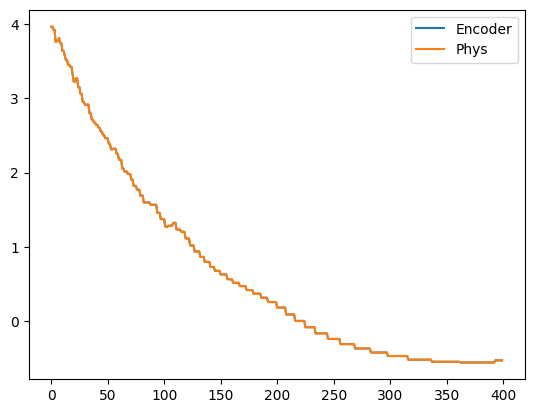

In [13]:
visacc(data_train)

### baseline comparition

In [35]:
torch.cuda.empty_cache() 
torch.manual_seed(42)

data_folder = np.load('Data/color_mnist.npz')
data_train = data_folder['train_x']
data_train[data_train < 205 ] = 0
data_train= data_train[0:1000,:,:,:,0:2]
data_train = data_train/255
print(data_train.max())
print(data_train.shape) 
#
#data_train = new_data

#data_train = data_merge_mask

dt = 0.3
train_dataloader, test_dataloader, train_x, val_x  = loader.getLoader_folder(data_train, split=True)
latentEncoder = mainmodel.EndPhysMultiple(dt = dt, 
                                          in_size=64, 
                                          n_mask = 2, 
                                          in_channels = 2, 
                                          latent_dim=2, 
                                          pmodel = "ODE_2ObjectsSpring", 
                                          init_phys = [10.0,1.0], initw=False)
latentEncoder, log  = train.train_m(latentEncoder, 
                                            train_dataloader, 
                                            test_dataloader,     
                                            init_phys=2.0 ,                           
                                            loss_name='latent_loss_multiple')




0.996078431372549
(1000, 12, 64, 64, 2)
Using device: cuda


Initial Loss 	 training loss: 29.417201555692234 	 validation loss: 29.40202760696411
epoch: 10 	 training loss: 0.575204305923902 	 validation loss: 0.8306232988834381
epoch: 20 	 training loss: 0.25015393701883465 	 validation loss: 0.5794979631900787
epoch: 30 	 training loss: 0.3250592052936554 	 validation loss: 0.653810977935791
epoch: 40 	 training loss: 0.24404698037184203 	 validation loss: 0.49713169038295746
epoch: 50 	 training loss: 0.2223519212924517 	 validation loss: 0.50523641705513
epoch: 60 	 training loss: 0.19835209961120898 	 validation loss: 0.46331357955932617
epoch: 70 	 training loss: 0.20322989500485933 	 validation loss: 0.512122817337513
epoch: 80 	 training loss: 0.1932481825351715 	 validation loss: 0.4365239366889
epoch: 90 	 training loss: 0.22363902513797468 	 validation loss: 0.49365542083978653
loss tensor(0.0289, device='cuda:0', grad_fn=<AddBackward0>)
KLD_4d tensor(0.0765, device='cuda:0', grad_fn=<MulBackward0>)
KLD_2d tensor(0.7547, device='cuda

best model a 2.0172390937805176
best last a 2.0453126430511475
best model b 1.0525096654891968
best last b 1.0302318334579468


In [38]:
k = []
eq = []
k.append( [element["k"] for element in log  ])
eq.append( [element["eq_distance"] for element in log  ] )

#file_path = 'k_ours_10.txt'

# Write the list to a file
with open(file_path, 'w') as file:
    for value in k[0]:
        file.write(f"{value}\n")

#file_path = 'eq_ours_10.txt'

# Write the list to a file
with open(file_path, 'w') as file:
    for value in eq[0]:
        file.write(f"{value}\n")

C:\Users\aleja\AppData\Local\Temp\ipykernel_50464\2318630911.py:60: UserWarning: The label '_nolegend_' of <matplotlib.lines.Line2D object at 0x0000016EA266DC30> starts with '_'. It is thus excluded from the legend.
  first_legend = ax.legend(handles=lines[:-3], fontsize="20", loc ="lower center")
C:\Users\aleja\AppData\Local\Temp\ipykernel_50464\2318630911.py:60: UserWarning: The label '_nolegend_' of <matplotlib.lines.Line2D object at 0x0000016E9DBD50C0> starts with '_'. It is thus excluded from the legend.
  first_legend = ax.legend(handles=lines[:-3], fontsize="20", loc ="lower center")
C:\Users\aleja\AppData\Local\Temp\ipykernel_50464\2318630911.py:60: UserWarning: The label '_nolegend_' of <matplotlib.lines.Line2D object at 0x0000016EA294C4C0> starts with '_'. It is thus excluded from the legend.
  first_legend = ax.legend(handles=lines[:-3], fontsize="20", loc ="lower center")
The PostScript backend does not support transparency; partially transparent artists will be rendered op

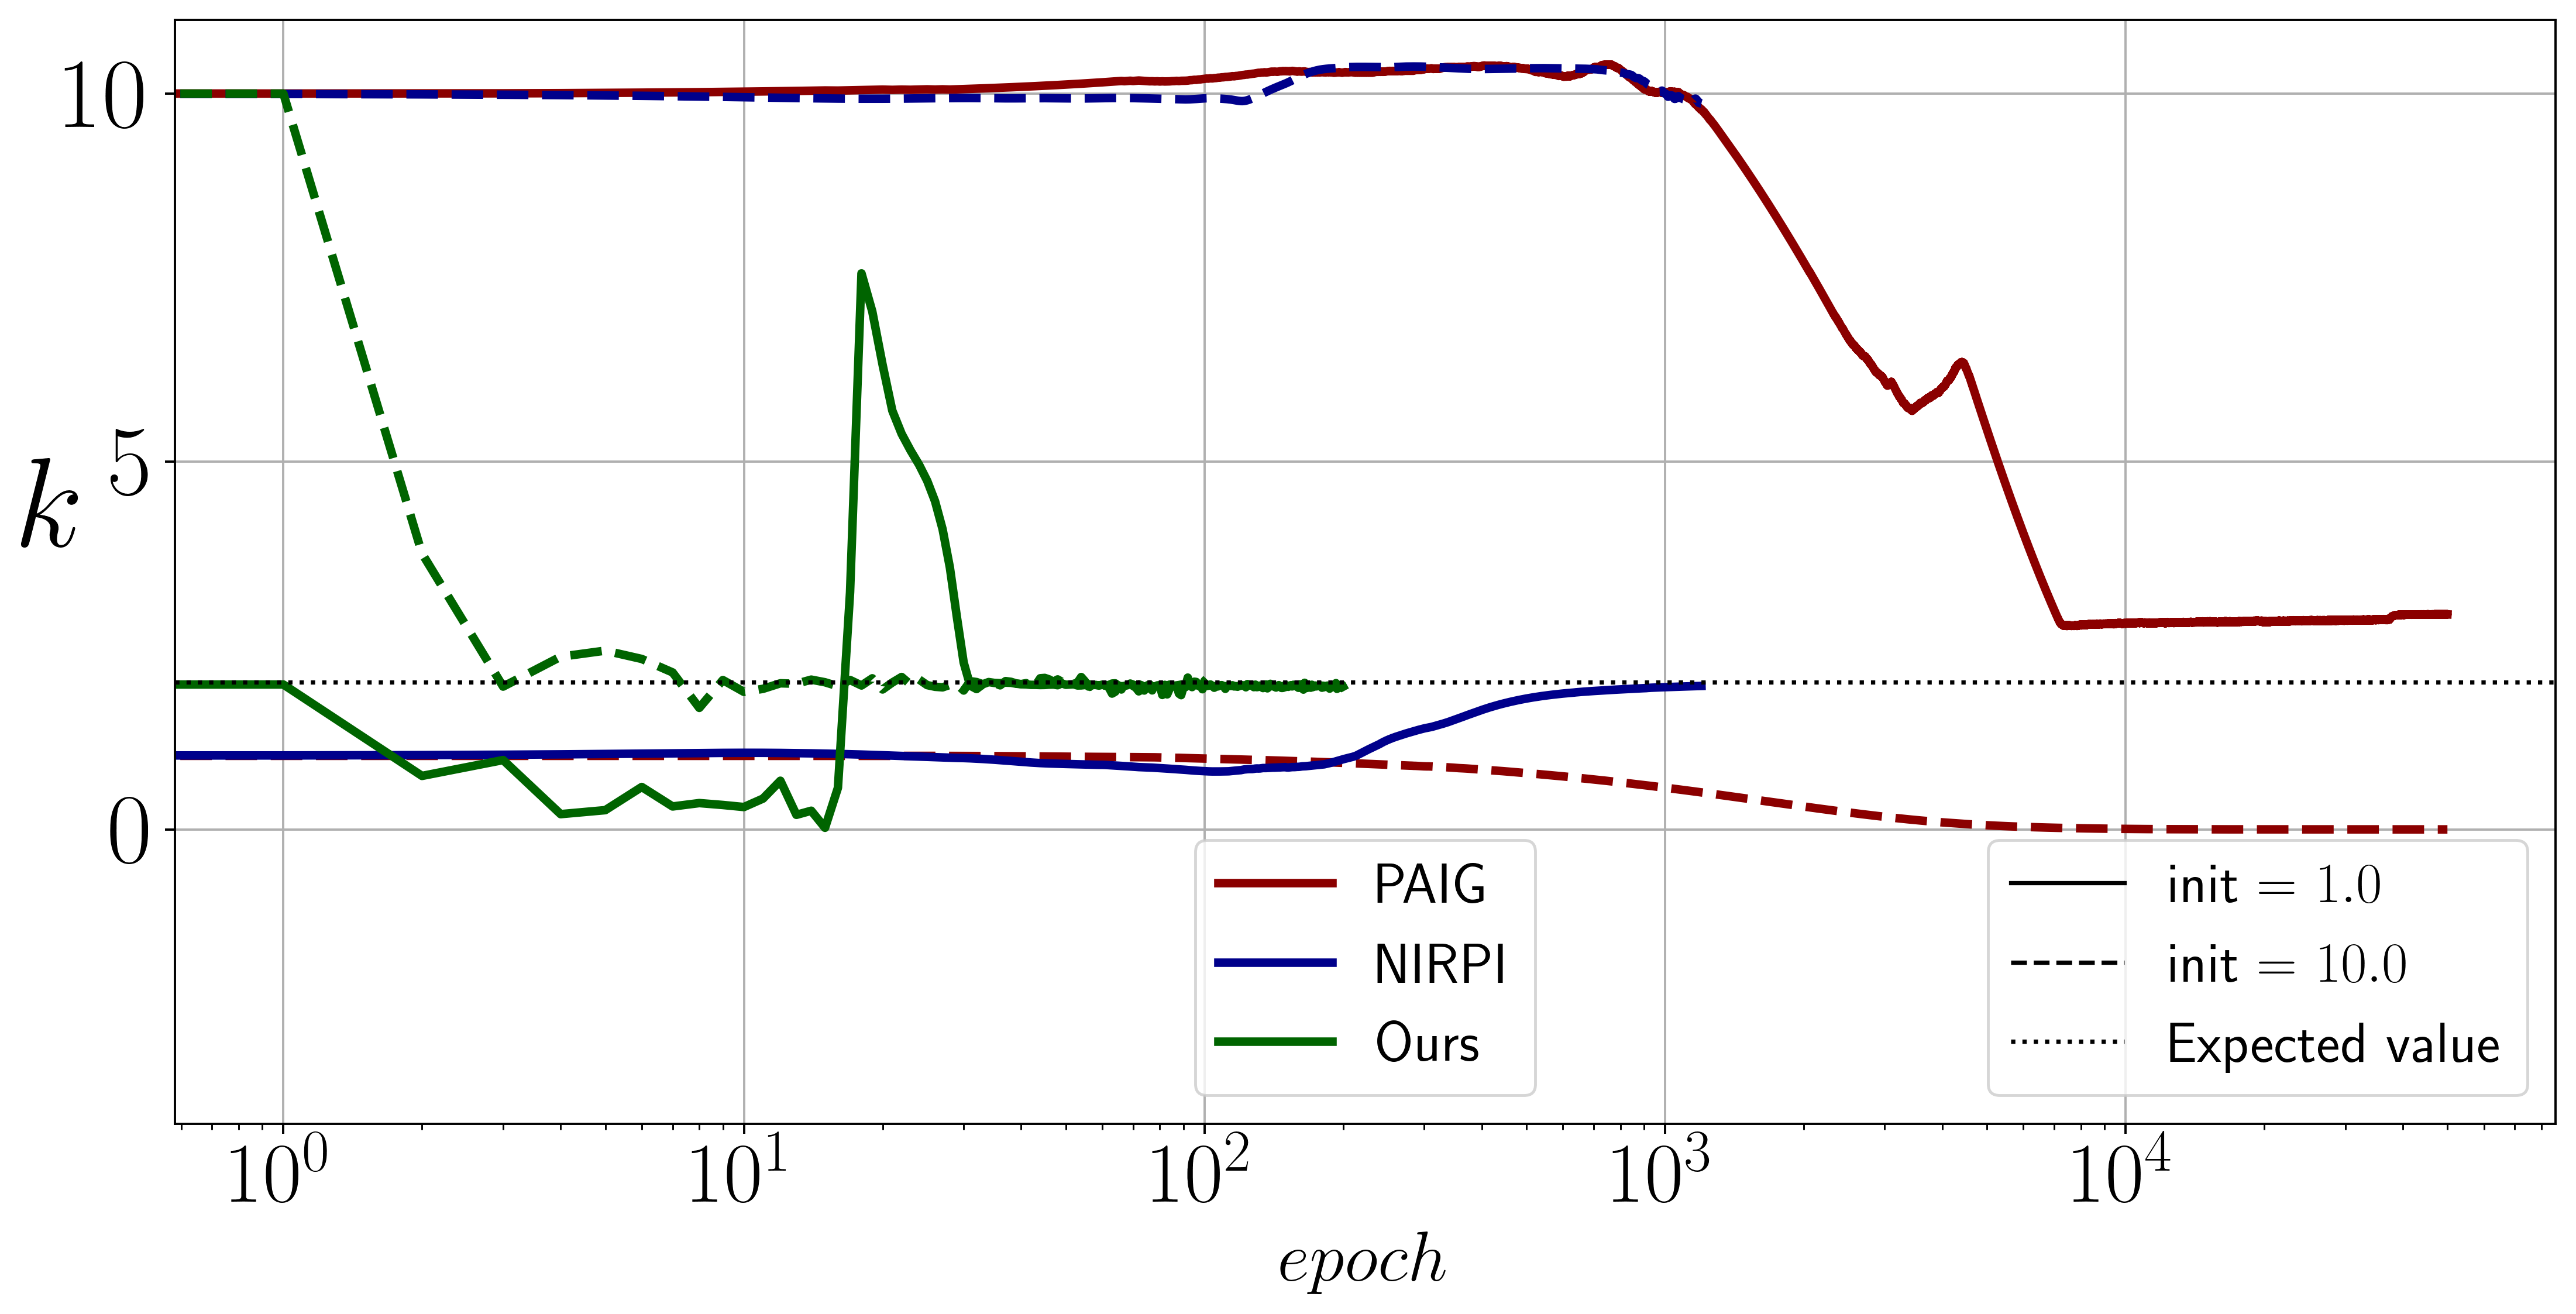

In [34]:
import matplotlib.pyplot as plt

# Function to read values from a text file
def read_values_from_file(file_path):
    with open(file_path, 'r') as file:
        values = file.readlines()
    # Convert each value to a float and return a list of values
    return [float(value.strip()) for value in values]

# Read values from the two text files
baseLine1_1 = read_values_from_file('log_k (1).txt')
baseLine1_10 = read_values_from_file('log_k.txt')

baseLine2_1 = read_values_from_file('neural_k_1.txt')
baseLine2_10 = read_values_from_file('neural_k_10.txt')

ours_1 = read_values_from_file('k_ours.txt')
ours_10 = read_values_from_file('k_ours_10.txt')

baseLine1_1 = np.exp(np.array(baseLine1_1))
baseLine1_10 = np.exp(np.array(baseLine1_10))

baseLine2_1 = np.array(baseLine2_1)
baseLine2_10 = np.array(baseLine2_10)

ours_1 = np.array(ours_1)
ours_10 = np.array(ours_10)

ours_10 = np.insert(ours_10, 0, ours_10[0])

# Plot the values
fig, ax =plt.subplots(figsize=(15, 7), dpi=350	)
plt.plot(baseLine1_1, label=r'PAIG', color='darkred', linewidth=3)
plt.plot(baseLine1_10, label='_nolegend_', color='darkred', linestyle='--', linewidth=3)
plt.plot(baseLine2_1, label=r'NIRPI', color='darkblue', linewidth=3)
plt.plot(baseLine2_10, label='_nolegend_', color='darkblue', linestyle='--', linewidth=3)

plt.plot(ours_1, label=r'Ours', color='darkgreen', linewidth=3)
plt.plot(ours_10, label='_nolegend_', color='darkgreen', linestyle='--', linewidth=3)

plt.xscale('log')
#plt.yscale('log')

#plt.xlim(0, 1200)

plt.ylim(-4, 11)
plt.rcParams['text.usetex'] = True
plt.xlabel(r'$epoch$',size=25)
plt.ylabel(r'$k$',size=45, rotation=0)

plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=35)
plt.tick_params(axis='y', which='major')#, pad=25)

aa, = plt.plot(0,0, color='k', label=r'init = $1.0$')
aa1, =plt.plot(0,0, color='k', linestyle = '--', label=r'init = $10.0$')
aa2 =plt.axhline(2, color='k', linestyle = ':', label=r'Expected value')
lines = ax.get_lines()

first_legend = ax.legend(handles=lines[:-3], fontsize="20", loc ="lower center")
ax.add_artist(first_legend)
second_legend= plt.legend(handles=lines[-3:], fontsize="20", loc ="lower right")

#plt.legend()
plt.grid(True)
folder = "./Figures/figs_init"
name = "k_comparison"
name_plot = folder+"/"+name+".png"
name_plot_eps = folder+"/"+name+".eps"
plt.savefig(name_plot, dpi=300, transparent=True,bbox_inches='tight')
plt.savefig(name_plot_eps, format='eps')

plt.show()

In [23]:
# duplicate firts value of the list
ours_1 = np.insert(ours_1, 0, ours_1[0])

3.750284194946289


### Chaos

In [85]:
data_folder = np.load('Data/dataset_chaos2.npy')

data_train = data_folder
dt = 1
train_dataloader, test_dataloader, train_x, val_x  = loader.getLoader_folder(data_train, split=True)


latentEncoder = mainmodel.EndPhys(dt = dt,  
                            pmodel = "Clifford_Attractor",
                            latent_dim=2,
                            init_phys = inits, 
                            initw=True)

latentEncoder, log  = train.train(latentEncoder, 
                                train_dataloader, 
                                test_dataloader,
                                init_phys = 1.5,                                 
                                loss_name='latent_loss')

Using device: cuda


Initial Loss 	 training loss: 10.004233741760254 	 validation loss: 10.633880615234375
epoch: 10 	 training loss: 0.7392917037010193 	 validation loss: 1.49638831615448
epoch: 20 	 training loss: 0.8172972798347473 	 validation loss: 1.6004199385643005
epoch: 30 	 training loss: 75.18536939620972 	 validation loss: 338.37916564941406
epoch: 40 	 training loss: 5.931604170799256 	 validation loss: 2.9123752117156982
epoch: 50 	 training loss: 0.6149587273597718 	 validation loss: 2.2284154891967773
epoch: 60 	 training loss: 0.6251237750053406 	 validation loss: 2.7105536460876465
epoch: 70 	 training loss: 0.48465263843536377 	 validation loss: 2.995890498161316
epoch: 80 	 training loss: 0.4564827024936676 	 validation loss: 2.9983434677124023
epoch: 90 	 training loss: 0.6277141213417053 	 validation loss: 2.6644561290740967
epoch: 100 	 training loss: 0.48467053174972535 	 validation loss: 2.660174608230591


torch.Size([1, 20, 1, 50, 50])


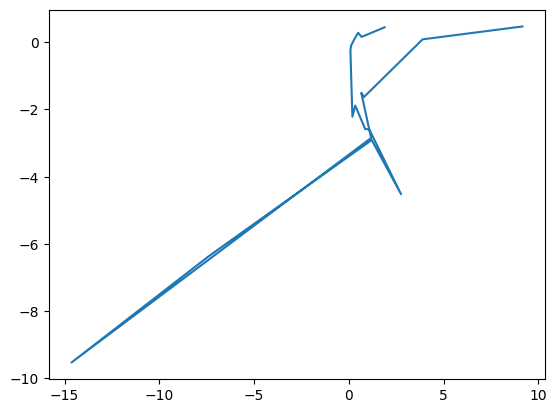

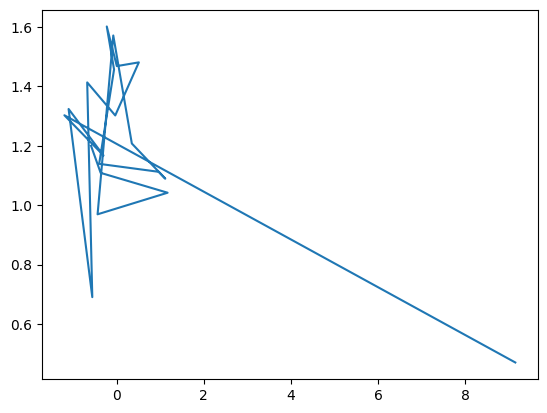

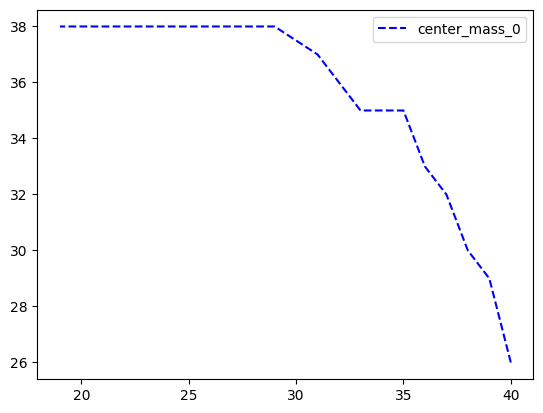

In [84]:
visual_loader  = loader.getLoader_folder(data_train, split=False)
vu.vis_chaos(latentEncoder, visual_loader)